In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wolin/.conda/envs/tf2/lib/python3.7

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
batch_size = 128
num_classes = 10
epochs = 12

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

Separate out the images by class

In [8]:
img_rows, img_cols = 28, 28

In [9]:
train_classes = []
test_classes = []

#for all 10 digits
for i in range(0,9+1):
    #find all the examples of this digit
    train_digit_indices = np.argwhere(y_train==i)
    #this changes the shape to (#ex, 1, 28, 28)
    examples = np.squeeze(x_train[train_digit_indices], axis=1)
    examples = examples.reshape(examples.shape[0], 1, img_rows, img_cols)
    train_classes.append(examples)
    
    test_digit_indices = np.argwhere(y_test==i)
    examples = np.squeeze(x_test[test_digit_indices], axis=1)
    examples = examples.reshape(examples.shape[0], 1, img_rows, img_cols)
    test_classes.append(examples)

In [10]:
train_classes[1].shape

(6742, 1, 28, 28)

In [11]:
len(train_classes)

10

In [12]:
train_classes[0][1,:,:].shape

(1, 28, 28)

In [13]:
input_shape = (1, img_rows, img_cols)

In [14]:
K.image_data_format()

'channels_first'

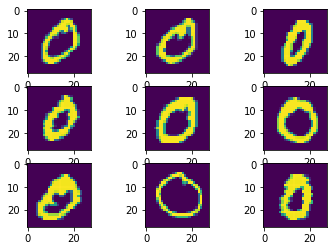

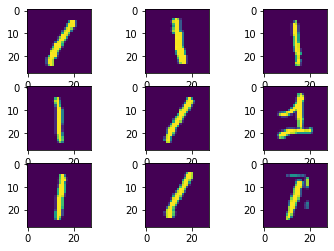

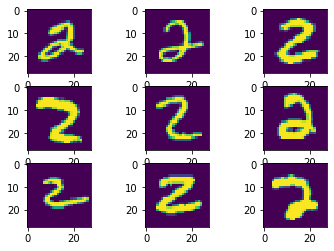

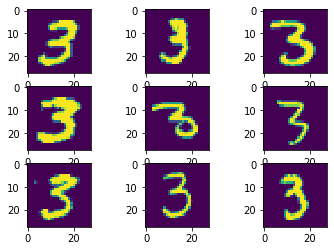

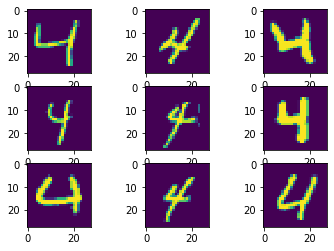

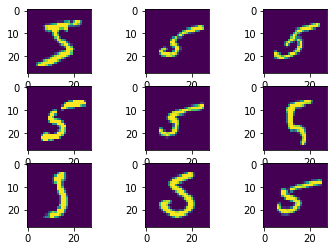

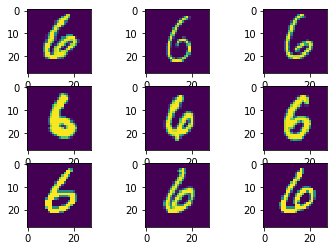

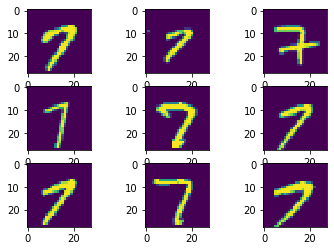

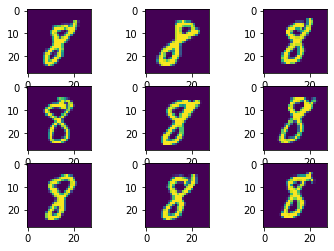

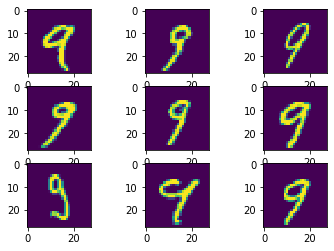

In [41]:
for i in range(10):
    plt.figure()
    for j in range(9):
        plt.subplot(330+j+1)
        plt.imshow(np.squeeze(train_classes[i][j], axis=0))

Convert to normalized floats

In [15]:
for (i,x) in enumerate(train_classes):
    x = x.astype('float32')
    x /= 255
    train_classes[i] = x

In [16]:
for (i,x) in enumerate(test_classes):
    x = x.astype('float32')
    x /= 255
    test_classes[i] = x

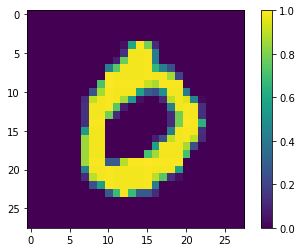

In [17]:
plt.imshow(test_classes[0][0,0,:,:])
plt.colorbar()

In [18]:
z_train = []
z_test = []

for i in range(10):
    n_train = train_classes[i].shape[0]
    truth = np.ones(n_train) * i
    truth = keras.utils.to_categorical(truth, num_classes)
    z_train.append(truth)
    print('Numeral', i, 'has', n_train, 'training examples.')
    
    n_test = test_classes[i].shape[0]
    print('Numeral', i, 'has', n_test, 'test examples.')
    truth = np.ones(n_test) * i
    truth = keras.utils.to_categorical(truth, num_classes)
    z_test.append(truth)

Numeral 0 has 5923 training examples.
Numeral 0 has 980 test examples.
Numeral 1 has 6742 training examples.
Numeral 1 has 1135 test examples.
Numeral 2 has 5958 training examples.
Numeral 2 has 1032 test examples.
Numeral 3 has 6131 training examples.
Numeral 3 has 1010 test examples.
Numeral 4 has 5842 training examples.
Numeral 4 has 982 test examples.
Numeral 5 has 5421 training examples.
Numeral 5 has 892 test examples.
Numeral 6 has 5918 training examples.
Numeral 6 has 958 test examples.
Numeral 7 has 6265 training examples.
Numeral 7 has 1028 test examples.
Numeral 8 has 5851 training examples.
Numeral 8 has 974 test examples.
Numeral 9 has 5949 training examples.
Numeral 9 has 1009 test examples.


In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Separate into batches which can be trained by numeral

In [71]:
int(train_classes[0].shape[0]/6)

987

In [85]:
x = np.linspace(0,10,11)

In [86]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [89]:
x[:2]

array([0., 1.])

In [88]:
x[2:]

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [21]:
train_sets = []
norm_sets = []
test_sets = []
train_truth_sets = []
test_truth_sets = []

for i in range(5):
    #take 1/6th of the training set (1/7th of the overall set) for normalization
    n_norm1 = int(train_classes[i*2].shape[0]/6)
    n_norm2 = int(train_classes[i*2+1].shape[0]/6)
    norm_sets.append(np.append(train_classes[i*2][:n_norm1, :], train_classes[i*2+1][:n_norm2, :], axis=0))
    
    train_sets.append(np.append(train_classes[i*2][n_norm1:, :], train_classes[i*2+1][n_norm2:, :], axis=0))
    train_truth_sets.append(np.append(z_train[i*2][n_norm1:, :], z_train[i*2+1][n_norm2:, :], axis=0))
    
    test_sets.append(np.append(test_classes[i*2], test_classes[i*2+1], axis=0))
    test_truth_sets.append(np.append(z_test[i*2], z_test[i*2+1], axis=0))

In [22]:
[print(x.shape[0]) for x in norm_sets]

2110
2014
1876
2030
1966


[None, None, None, None, None]

In [23]:
[print(x.shape[0]) for x in train_sets]

10555
10075
9387
10153
9834


[None, None, None, None, None]

In [93]:
#savedir = "/home/wolin/snn_toolbox/forgetting/"

In [95]:
#dirs = ["12/", "34/", "56/", "78/", "90/"]

In [98]:
#list(enumerate(dirs))

[(0, '12/'), (1, '34/'), (2, '56/'), (3, '78/'), (4, '90/')]

In [99]:
#[np.savez_compressed(savedir+dirx+"data/x_norm.npz", norm_sets[i]) for i,dirx in enumerate(dirs)]

[None, None, None, None, None]

In [100]:
#[np.savez_compressed(savedir+dirx+"data/x_test.npz", test_sets[i]) for i,dirx in enumerate(dirs)]

[None, None, None, None, None]

In [101]:
#[np.savez_compressed(savedir+dirx+"data/y_test.npz", test_truth_sets[i]) for i,dirx in enumerate(dirs)]

[None, None, None, None, None]

In [24]:
train_sets[0].shape

(10555, 1, 28, 28)

In [134]:
train_truth_sets[1]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Do some training!

In [25]:
def train_on_set(m, i):
    m.fit(train_sets[i], train_truth_sets[i],
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(test_sets[i], test_truth_sets[i]))
    score = m.evaluate(test_sets[i], test_truth_sets[i], verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [26]:
def digit_accuracy(m):
    acc = np.zeros(10)
    for i in range(10):
        acc[i] = m.evaluate(test_classes[i], z_test[i])[1]
        
    return acc

In [27]:
m12 = train_on_set(model, 0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10555 samples, validate on 2115 samples
Epoch 1/12
10555/10555 [==============================] - 5s 487us/step - loss: 0.0788 - acc: 0.9791 - val_loss: 0.0044 - val_acc: 0.9986
Epoch 2/12
10555/10555 [==============================] - 5s 466us/step - loss: 0.0065 - acc: 0.9985 - val_loss: 0.0020 - val_acc: 0.9991
Epoch 3/12
10555/10555 [==============================] - 5s 462us/step - loss: 0.0059 - acc: 0.9983 - val_loss: 0.0020 - val_acc: 0.9991
Epoch 4/12
10555/10555 [==============================] - 5s 460us/step - loss: 0.0051 - acc: 0.9986 - val_loss: 0.0024 - val_acc: 0.9991
Epoch 5/12
10555/10555 [==============================] - 5s 463us/step - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0020 - val_acc: 0.9991
Epoch 6/12
10555/10555 [==============================] - 5s 451us/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.0015 - val_acc: 0.9995
Epoch 7/12
10555/10555 [=====

In [29]:
acc12 = digit_accuracy(model)

1009/1009 [==============================] - 0s 191us/step


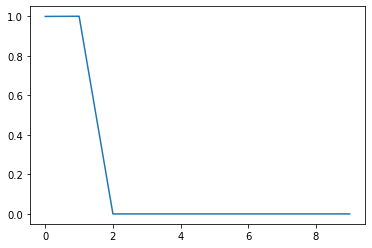

In [34]:
plt.plot(acc12)

In [35]:
model.save("mnist_12.h5")

In [36]:
train_on_set(model, 1)

Train on 10075 samples, validate on 2042 samples
Epoch 1/12
10075/10075 [==============================] - 5s 478us/step - loss: 0.4281 - acc: 0.9117 - val_loss: 0.0396 - val_acc: 0.9878
Epoch 2/12
10075/10075 [==============================] - 5s 471us/step - loss: 0.0582 - acc: 0.9812 - val_loss: 0.0200 - val_acc: 0.9922
Epoch 3/12
10075/10075 [==============================] - 5s 473us/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0142 - val_acc: 0.9941
Epoch 4/12
10075/10075 [==============================] - 5s 473us/step - loss: 0.0225 - acc: 0.9932 - val_loss: 0.0118 - val_acc: 0.9951
Epoch 5/12
10075/10075 [==============================] - 5s 469us/step - loss: 0.0195 - acc: 0.9938 - val_loss: 0.0089 - val_acc: 0.9956
Epoch 6/12
10075/10075 [==============================] - 5s 475us/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.0058 - val_acc: 0.9985
Epoch 7/12
10075/10075 [==============================] - 5s 474us/step - loss: 0.0119 - acc: 0.9960 - val_loss: 0.0052 - v

In [37]:
acc34 = digit_accuracy(model)

1009/1009 [==============================] - 0s 211us/step


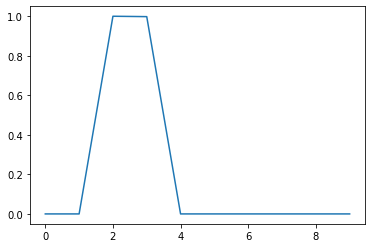

In [38]:
plt.plot(acc34)

In [39]:
model.save("mnist_1234.h5")